$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

This condition is called a $\textbf{sufficient decrease condition}$. \\
The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-2)^2 + (x_2 + 3)^2$.

In [16]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/1.19/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [17]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+3)**2 + (-2+x[0])**2


In [18]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-2), 2*(x[1]+3)])

In [19]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array 
  #Complete the code to compute step length
  #A = np.identity(2)    #we have already taken A as np.array([[1, 0],[0,1]]) in the lower cell.
  #gradf = evalg(x)
  gr_t = np.matrix.transpose(gradf)
  step_length = np.matmul(gr_t, gradf)/(2*np.matmul(np.matmul(gr_t, A), gradf))
  return step_length

In [20]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  gr_t = np.matrix.transpose(gradf)
  #implement the backtracking line search
  while evalf(np.add(x,-alpha*gradf)) > evalf(x)-gamma*alpha*np.matmul(gr_t, gradf):
    alpha = rho*alpha
  #print('final step length:',alpha)
  return alpha

In [21]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [22]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x , k , evalf(x)


**3 ANSWER:**

In [23]:

my_start_x = np.array([5,5])
my_tol= 1e-5

print("For CONSTANT_STEP_LENGTH procedure :")
x_opt, k, f_value = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print("Minimizer = ",x_opt,",Iteration = ",k,", Minimum function value = ", f_value) 

print("\nFor EXACT_LINE_SEARCH procedure :")
x_opt_els, k, f_value = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer = ",x_opt_els,",Iteration = ", k,", Minimum function value = ", f_value)

print("\nFor BACKTRACKING_LINE_SEARCH procedure :")
x_opt_bls, k, f_value = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print("Minimizer = ",x_opt_bls,",Iteration = ", k , ", Minimum function value = ",f_value)

For CONSTANT_STEP_LENGTH procedure :
Minimizer =  [ 2.00000151 -2.99999598] ,Iteration =  65 , Minimum function value =  1.8408617293418483e-11

For EXACT_LINE_SEARCH procedure :
Minimizer =  [ 2. -3.] ,Iteration =  1 , Minimum function value =  0.0

For BACKTRACKING_LINE_SEARCH procedure :
Minimizer =  [ 2. -3.] ,Iteration =  1 , Minimum function value =  0.0


**4 SOLUTION:**

In [24]:
my_start_x = np.array([10,10])
my_tol= 1e-12

print("For Exact line search:")
x_opt_els, k, f_value = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer = ",x_opt_els,",Iterations = ", k,",f(x) = ", f_value)

print("\nFor Backtracking_line_search:")
x_opt_bls, k, f_value = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print("Minimizer = ",x_opt_bls,",Iterations = ", k ,",f(x) = ", f_value)

For Exact line search:
Minimizer =  [ 2. -3.] ,Iterations =  1 ,f(x) =  0.0

For Backtracking_line_search:
Minimizer =  [ 2. -3.] ,Iterations =  1 ,f(x) =  0.0


**Comment :** \\
Here, from the above result we can say that the number of iterations required to obtain the minimizer is same (equal to 1) for both the exact line search and the backtracking line search procedure. Also the minimizer and the corresponding function value is same in both cases. 

**5 SOLUTION:**

In [25]:
# Backtracking line search for different values of alpha
my_start_x = np.array([10,10])
my_tol= 1e-9
alpha_list = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iterations_bls = []

for alpha_start in alpha_list:
  x_opt_bls, k, f_value = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, 0.5, 0.5)
  iterations_bls.append(k)
  print('for alpha = ',alpha_start, ', iter:', k, ', x: ',x_opt_bls, ', f(x): ', f_value)

for alpha =  1 , iter: 1 , x:  [ 2. -3.] , f(x):  0.0
for alpha =  0.9 , iter: 11 , x:  [ 2. -3.] , f(x):  2.3300003855701448e-20
for alpha =  0.75 , iter: 18 , x:  [ 2. -3.] , f(x):  4.9339669177562995e-20
for alpha =  0.6 , iter: 27 , x:  [ 2. -3.] , f(x):  7.561282499767123e-20
for alpha =  0.5 , iter: 1 , x:  [ 2. -3.] , f(x):  0.0
for alpha =  0.4 , iter: 16 , x:  [ 2. -3.] , f(x):  1.0007255782441984e-20
for alpha =  0.25 , iter: 35 , x:  [ 2. -3.] , f(x):  1.9735867671025198e-19
for alpha =  0.1 , iter: 109 , x:  [ 2. -3.] , f(x):  1.7417011453747528e-19
for alpha =  0.01 , iter: 1195 , x:  [ 2. -3.] , f(x):  2.498486159829666e-19


In [26]:
iterations_bls

[1, 11, 18, 27, 1, 16, 35, 109, 1195]

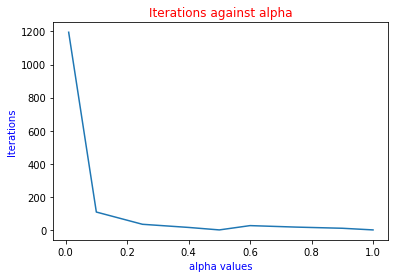

In [27]:
#Plotting Iterations against alpha values
import matplotlib.pyplot as plt
#plt.figure(figsize=(width,height))
plt.plot(alpha_list, iterations_bls)
plt.xlabel('alpha values',color='b')
plt.ylabel('Iterations',color='b')
plt.title('Iterations against alpha',color='r')
plt.show()

**Comments :** \\
**1.** It is obvious from the above graph that as the alpha value decreases from 1, the number of iterations increases gradually till alpha = 0.6, after that  iteration decreases to its minimum value 1 at alpha = 0.5 . \\
**2.** Further decrease in alpha value leads to a rapid increase in the number of iterations. \\
**3.** The minimizer remains same(i.e. [2, -3]) corresponding to every alpha value in the list [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01] whereas the function value starts from 0 (for alpha = 1 ), then increasing for decreasing alpha till alpha = 0.6, then suddenly falling to 0 at alpha = 0.5 . \
After that, again there is an increase in the function value. 


In [28]:
my_start_x = np.array([10,10])
my_tol= 1e-9

iterations_els = []

x_opt_els, k, f_value = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Number of iterations in exact line search = ", k)


Number of iterations in exact line search =  1


**Comment 4 :** \\
for **no** alpha value, gradient descent with backtracking line search takes lesser number of iterations when compared to the
gradient descent procedure with exact line search

**6 SOLUTION :**

In [29]:
my_start_x = np.array([10,10])
my_tol= 1e-9
rho_list = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iterat_bls = []

for rho in rho_list:
  x_opt_bls, k, f_value = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, rho, 0.5)
  iterat_bls.append(k)
  print('for rho = ',rho, ', iter:', k, ', x: ',x_opt_bls, 'f(x): ', f_value)

for rho =  0.9 , iter: 8 , x:  [ 2. -3.] f(x):  3.6998512426496585e-20
for rho =  0.8 , iter: 15 , x:  [ 2. -3.] f(x):  1.2114568353050201e-20
for rho =  0.75 , iter: 14 , x:  [ 2. -3.] f(x):  6.227537189331739e-21
for rho =  0.6 , iter: 19 , x:  [ 2. -3.] f(x):  2.287501357495847e-19
for rho =  0.5 , iter: 1 , x:  [ 2. -3.] f(x):  0.0
for rho =  0.4 , iter: 16 , x:  [ 2. -3.] f(x):  1.0007255782441984e-20
for rho =  0.25 , iter: 35 , x:  [ 2. -3.] f(x):  1.9735867671025198e-19
for rho =  0.1 , iter: 109 , x:  [ 2. -3.] f(x):  1.7417011453747528e-19
for rho =  0.01 , iter: 1195 , x:  [ 2. -3.] f(x):  2.498486159829666e-19


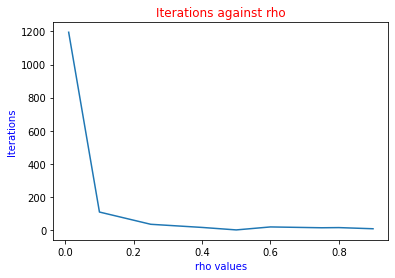

In [30]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(width,height))
plt.plot(rho_list, iterat_bls)
plt.xlabel('rho values',color='b')
plt.ylabel('Iterations',color='b')
plt.title('Iterations against rho',color='r')
plt.show()

**Comments:** \\
**1.** here for decreasing value of $rho$ the number of iterations first increases then decreases to 1 at $rho = 0.5$ . After that number of iterations starts increasing rapidly for rho $>$ 0.5 . \\
**2.** for decreasing **rho** value first the function value decreases reaching value 0 at **rho** = 0.5 . Further decrease in **rho** value leads to an increase in the function value. \\
**3.** for **no** rho value, gradient descent with backtracking line search takes lesser number of iterations when compared to the gradient descent procedure with exact line search